In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('electrical_grid.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [3]:
df.stabf.value_counts()

stabf
unstable    6380
stable      3620
Name: count, dtype: int64

#Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


#Check For Missing Values

In [6]:
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64


#Distribution of Stabillity Values

In [7]:
stabf_counts = df['stabf'].value_counts()
print("Distribution of 'stabf' (stability factor:")
print(stabf_counts)

Distribution of 'stabf' (stability factor:
stabf
unstable    6380
stable      3620
Name: count, dtype: int64


#Visualize the Distribution of Stability Values

Text(0.5, 1.0, 'Stability Factor Distribution')

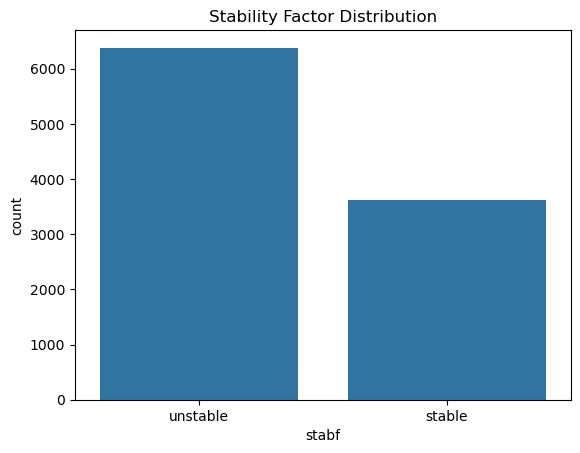

In [8]:
sns.countplot(data=df, x='stabf')
plt.title('Stability Factor Distribution')

#Visualize the Distributions of the Numerical Features 

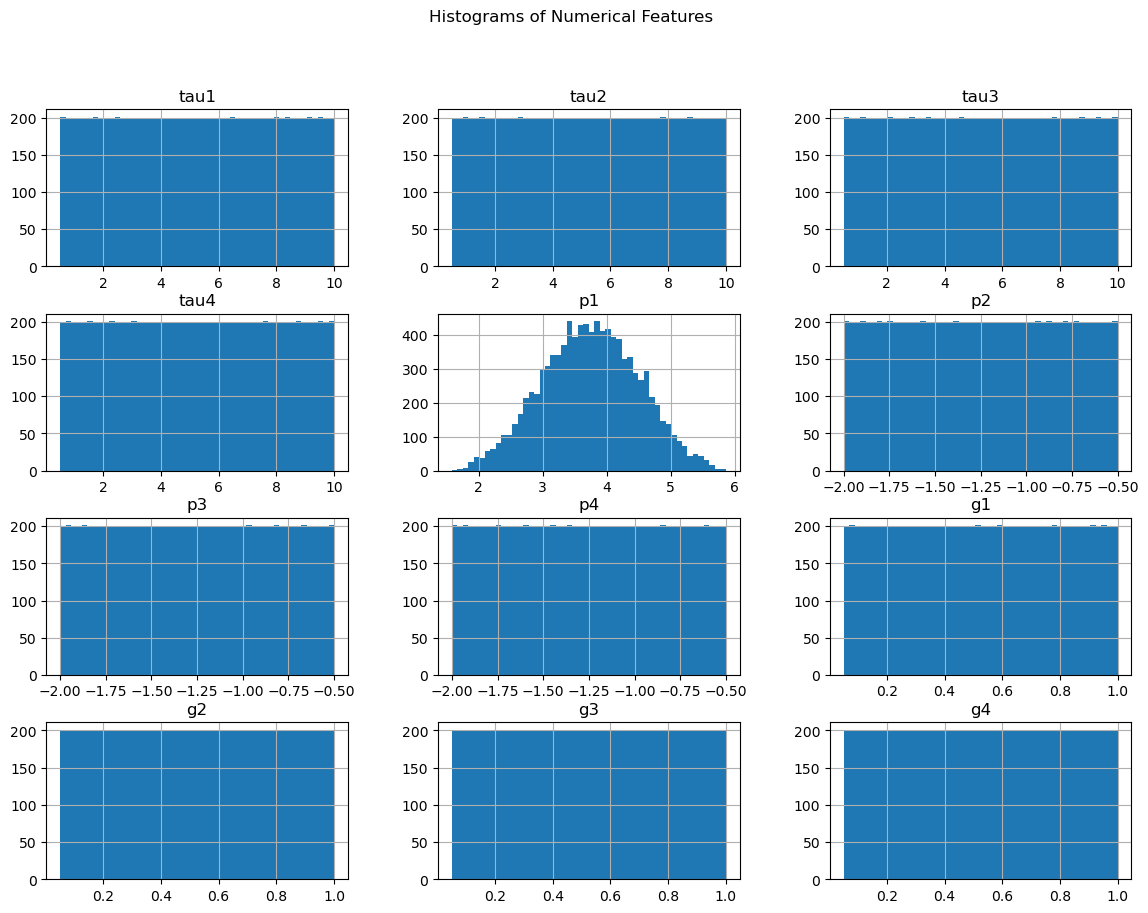

In [10]:
df.hist(bins=50, figsize=(14,10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

#Convert 'stabf' to a Binary Variable for Correlation Analysis (0: Stable, 1: Unstable)

In [14]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf,stabf_binary
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable,1


In [15]:
df['stabf_binary'] = df['stabf'].apply(lambda x: 1 if x == 'unstable' else 0)

In [16]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf,stabf_binary
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable,1


In [18]:
df.drop('stabf', axis=1, inplace=True)

In [19]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf_binary
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


#Calculate the Correlation Metrix

In [20]:
correlation_matrix = df.corr()

In [21]:
correlation_matrix

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf_binary
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.234898
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.246280
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.237492
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.239375
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.009938
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006173
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.000649
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.022785
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.197664
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.217341


#Display Correlation with the Stability Factor

In [22]:
stabf_corr = correlation_matrix['stabf_binary'].sort_values(ascending=False)
print("Correlation with stability ('stabf_binary'):")
print(stabf_corr)

Correlation with stability ('stabf_binary'):
stabf_binary    1.000000
tau2            0.246280
tau4            0.239375
tau3            0.237492
tau1            0.234898
g3              0.231774
g2              0.217341
g4              0.204931
g1              0.197664
p1              0.009938
p2              0.006173
p3             -0.000649
p4             -0.022785
Name: stabf_binary, dtype: float64


#Visualize the Correlation Matrix

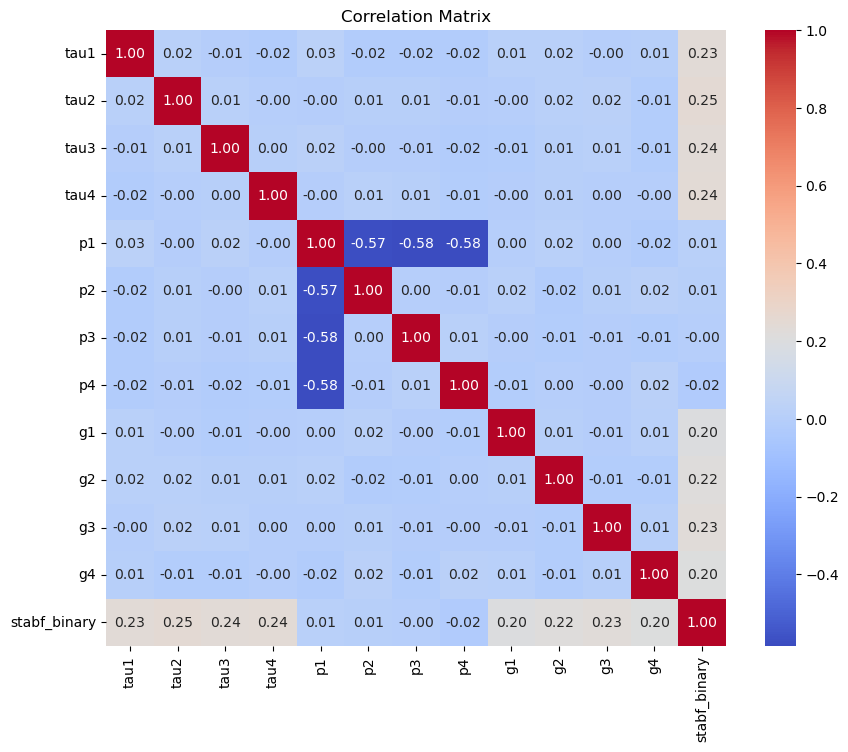

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Visual the Top Correlated Features with the Stability

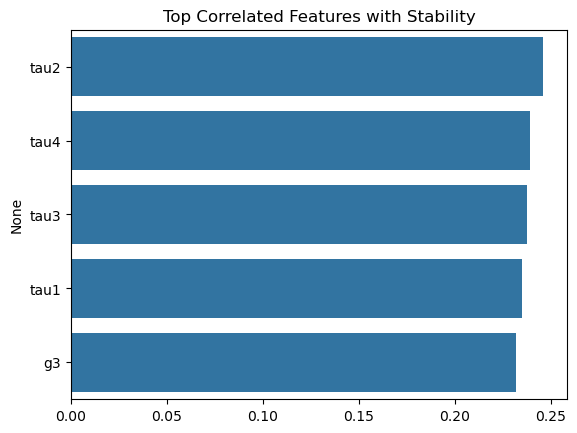

In [27]:
top_corr = stabf_corr[1:6]
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Correlated Features with Stability')
plt.show()

#Split the Data into Features (X) and Target(Y)

In [31]:
X = df.drop(columns=['stabf_binary'])
y = df['stabf_binary']

#Split the Data into Trainning Testing sets

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [34]:
X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9069,7.308766,3.718575,0.890452,9.821006,4.391436,-1.129722,-1.379985,-1.881729,0.198130,0.286181,0.239839,0.255856
2603,1.346364,8.995978,6.588486,3.164015,2.590775,-1.029779,-0.971504,-0.589492,0.141372,0.191807,0.436798,0.563026
7738,6.068477,7.114495,1.643937,3.248104,3.219985,-0.558313,-0.927081,-1.734591,0.470227,0.813813,0.143296,0.449678
1579,6.841556,4.391621,2.974986,9.548470,2.843119,-1.337277,-0.563795,-0.942047,0.493630,0.142099,0.510564,0.965664
5058,2.079181,9.630668,3.308782,3.941799,3.600997,-1.318294,-1.196225,-1.086478,0.654963,0.778023,0.127205,0.393785


In [35]:
X_train.shape

(7000, 12)

#Standardize the Features

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Classification

In [39]:
#K-Neighborse Classifier(KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, confusion_matrix, RocCurveDisplay

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

#Train the Model

In [46]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

#Make Predictions

In [47]:
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [48]:
knn.score(X_test_scaled, y_test)

0.8586666666666667

#Evaluate the Model

In [50]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1061
           1       0.87      0.92      0.89      1939

    accuracy                           0.86      3000
   macro avg       0.85      0.83      0.84      3000
weighted avg       0.86      0.86      0.86      3000



In [51]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Testing Accuracy Score: 0.8586666666666667


In [58]:
print("Training Accuracy Score:", accuracy_score(y_train, knn.predict(X_train_scaled)))

Training Accuracy Score: 0.9175714285714286


#Confusion Matrix for KNN

In [59]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn) 
conf_matrix_knn

array([[ 790,  271],
       [ 153, 1786]], dtype=int64)

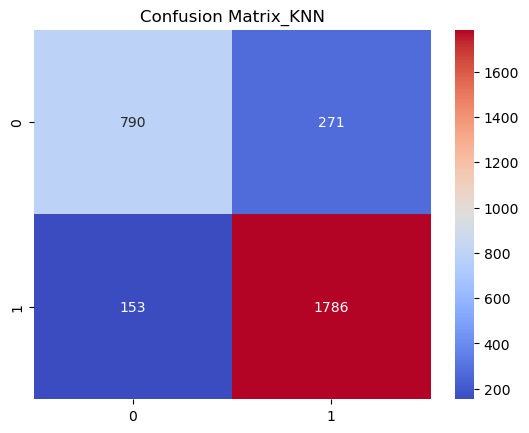

In [61]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix_KNN')
plt.show()

#Precision

In [63]:
precision_score(y_test, y_pred_knn)

0.8682547399124939

#Recall

In [64]:
recall_score(y_test, y_pred_knn)

0.9210933470861269

#f1_score

In [65]:
f1_score(y_test, y_pred_knn)

0.8938938938938938

#Roc Curve

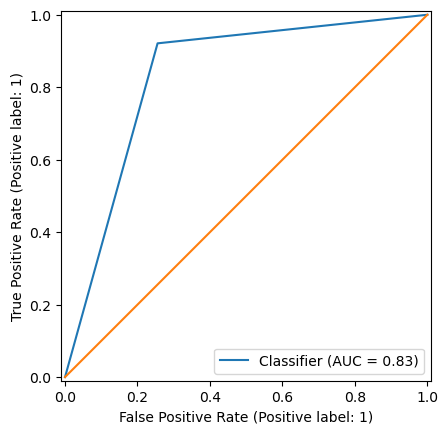

In [66]:
RocCurveDisplay.from_predictions(y_test, y_pred_knn)
plt.plot([0,1],[0,1])
plt.show()

#K-Fold Cross Validation

from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)

#Perform K-Fold Cross Validation

In [70]:
kfold_scores = cross_val_score(knn, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [71]:
kfold_scores

array([0.84142857, 0.86071429, 0.84642857, 0.83285714, 0.84785714])

In [72]:
kfold_scores.mean()

0.8458571428571429

#Stratifiedkfold Cross Validation

In [76]:
print("K-Fold Cross Validation Scores(5 Folds):", [f"{score:.2f}" for score in kfold_scores])
print(f"Mean K-Fold Accuracy: {kfold_scores.mean():.2f}")

K-Fold Cross Validation Scores(5 Folds): ['0.84', '0.86', '0.85', '0.83', '0.85']
Mean K-Fold Accuracy: 0.85


In [81]:
from sklearn.model_selection import StratifiedKFold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [83]:
strat_kfold_scores = cross_val_score(knn, X_train_scaled, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.84857143, 0.85142857, 0.84357143, 0.86285714, 0.85785714])

#Round the Scores two Decimal Place

In [84]:
strat_kfold_scores_rounded = [round(score, 2) for score in strat_kfold_scores]
strat_kfold_scores_rounded

[0.85, 0.85, 0.84, 0.86, 0.86]

In [86]:
print("Stratified K-Fold Cross Validation Scores (5 fold):", strat_kfold_scores_rounded)
print(f"Mean Stratified K-Fold Accuracy: {round(strat_kfold_scores.mean(), 2)}")

Stratified K-Fold Cross Validation Scores (5 fold): [0.85, 0.85, 0.84, 0.86, 0.86]
Mean Stratified K-Fold Accuracy: 0.85
